# Actividad 
Implementar los algoritmos `non-dominated set` (p. 417) y `non-dominated sorting` (p. 418). Suponga que se busca minimizar ambas funciones objetivo $f_1(x)$ y $f_2(x)$.

## Notas:
- Los arreglos en Python empiezan en 0, por lo que en el Step 1 considere inicializar $P' = \{0\}$, el counter $i = 1$ y en el Step 2 $j=0$.

### Generar un conjunto de puntos aleatorios

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_points(N=100):
    return [np.random.rand(2) for i in range(N)]

def plot_points(points,figsize=(6,6),plot_idx=True):
    fig,ax = plt.subplots(figsize=figsize)
    M = np.array(points)    
    plt.scatter(M[:,0],M[:,1],s=100,color='gray',alpha=0.5)
    if plot_idx:
        for idx,p in enumerate(points):
            plt.text(p[0],p[1],str(idx), ha='center',va='center')
    plt.xlabel('$f_1(x)$',fontsize=18)
    plt.ylabel('$f_2(x)$',fontsize=18)
    plt.show()
    
def plot_nondominatedset(points,P,figsize=(6,6)):
    fig,ax = plt.subplots(figsize=figsize)
    nd_mask = np.zeros(len(points), dtype=bool)
    for p in P:
        nd_mask[p]=True
    M = np.array(points)
    M1 = M[np.logical_not(nd_mask),:]
    plt.scatter(M1[:,0],M1[:,1],s=100,color='gray',alpha=0.5)
    M2 = M[nd_mask,:]
    plt.scatter(M2[:,0],M2[:,1],s=100,color='red',alpha=1)
    plt.xlabel('$f_1(x)$',fontsize=18)
    plt.ylabel('$f_2(x)$',fontsize=18)
    plt.show()
    
def plot_nondominatedsort(points,fronts,figsize=(6,6)):
    if len(fronts) == 0:
        return
    fig,ax = plt.subplots(figsize=figsize)    
    for idx,F in enumerate(fronts):
        P = sorted([points[p] for p in F], key=lambda x:(x[0],x[1]))
        M = np.array(P)
        plt.plot(M[:,0],M[:,1],'o-',alpha=0.5)
        for p in F:
            plt.text(points[p][0],points[p][1],str(idx), ha='center',va='center')
    plt.xlabel('$f_1(x)$',fontsize=18)
    plt.ylabel('$f_2(x)$',fontsize=18)
    plt.show()

In [2]:
def dominates(p1,p2):
    return ((p1[0]<=p2[0] and p1[1]<=p2[1]) and (p1[0]<p2[0] or p1[1]<p2[1]))

In [3]:
def nondominatedset(points):
    puntos = [(e[0],e[1])for e in points]
    n = len(puntos)
    P = []
    eliminado = []
    frente=[]
    ###INSERTE SU CÓDIGO AQUÍ
    P.append(puntos[0])
    for i in range(1,n):
        dominado = False
        for j in P:
            if dominates(puntos[i],j):
                if j not in eliminado:
                    eliminado.append(j)
            if dominates(j,puntos[i]):
                dominado = True
        if not dominado:
            P.append(puntos[i])   
        
    for e in P:
        if e not in eliminado:
            frente.append(puntos.index(e))
    return frente

In [4]:
def nondominatedsort(points):
    n = len(points)
    S = np.zeros(n, dtype=int)
    dominancia = {}
    ###INSERTE SU CÓDIGO AQUÍ
    sets = []
    for i in range(n-1):
        for j in range(i+1,n):
            if dominates(points[i],points[j]):
                S[j]+=1
                if str(i) not in dominancia:
                    dominancia[str(i)] = [j]
                else:
                    dominancia[str(i)].append(j)
            if dominates(points[j],points[i]):
                S[i] +=1
                if str(j) not in dominancia:
                    dominancia[str(j)] = [i]
                else:
                    dominancia[str(j)].append(i)
                
    
    #print(S)
    #print(dominancia)
    #cond = True
    while(True):
        subset = []
        for i in range(len(S)):
            if S[i] == 0:
                subset.append(i)
                S[i] = -999
        
        for e in subset:
            if str(e) in dominancia:
                for ind in dominancia[str(e)]:
                    S[ind] -= 1
        sets.append(subset)
        if max(S) == -999:
            break
        
            
    #print(S)
                
    #print(sets)
            
    
    return sets

In [5]:
def dominado(p1,p2):
    M = len(p1)
    mejor = False
    for m in range(M):
        if p1[m] > p2[m]:
            return False
        if p1[m] < p2[m]:
            mejor = True
    return mejor

In [6]:
def crawling(pareto,points):
    #frente2 = [[(points[pareto[i]][0],points[pareto[i]][0]),pareto[i]] for i in range(len(pareto))]
    frente = [[[e for e in points[pareto[i]]],pareto[i]] for i in range(len(pareto))]
    #print(frente2)
    #frente = [[(9,7),1],[(20,3),2],[(12,5),3],[(1,15),4]]
    #D = np.zeros(len(frente),dtype = int)
    D = [0 for _ in frente]
    frentecpy = frente[:]
    #print("no ordenado",frentecpy)
    frentecpy.sort()
    #print("ordenado",frentecpy)
    puntos = [e[1] for e in frentecpy]
    #print(puntos)
    for obj in range(len(frentecpy[0])):
        valobj = [e[0][obj] for e in frentecpy]
        #print("objetivo",obj+1,valobj)
        fmin = min(valobj)
        fmax = max(valobj)
        fres = fmin - fmax
        #print("fmin",fmin,"fmax",fmax)
        D[frente.index(frentecpy[0])] = 999
        D[frente.index(frentecpy[-1])] = 999
        for i in range(1,len(frente)-1):
            top = frentecpy[i-1][0][obj] - frentecpy[i+1][0][obj]
            if top<0:
                top*=-1
            #print(frentecpy[i+1][0][obj],"-",frentecpy[i-1][0][obj])
            D[frente.index(frentecpy[i])] += (top)/fres
    #print(D)
    
    for i in range(len(D)):
        if D[i]<0:
            D[i] *= -1
            
    print(D)
    
    semeacabaronlasideas = [(D[i],frente[i][1]) for i in range(len(frente))]
    #print(semeacabaronlasideas)
    semeacabaronlasideas.sort()
    #print(semeacabaronlasideas)
    semeacabaronlasideas = semeacabaronlasideas[::-1]
    #print(semeacabaronlasideas)
    return [e[1] for e in semeacabaronlasideas]

In [7]:
def craw():
    frente = [[(9,7),1],[(20,3),2],[(12,5),3],[(1,15),4]]
    #D = np.zeros(len(frente),dtype = int)
    D = [0 for _ in frente]
    frentecpy = frente[:]
    #print("no ordenado",frentecpy)
    frentecpy.sort()
    #print("ordenado",frentecpy)
    puntos = [e[1] for e in frentecpy]
    #print(puntos)
    for obj in range(len(frentecpy[0])):
        valobj = [e[0][obj] for e in frentecpy]
        #print("objetivo",obj+1,valobj)
        fmin = min(valobj)
        fmax = max(valobj)
        fres = fmin - fmax
        #print("fmin",fmin,"fmax",fmax)
        D[frente.index(frentecpy[0])] = 999
        D[frente.index(frentecpy[-1])] = 999
        for i in range(1,len(frente)-1):
            top = frentecpy[i-1][0][obj] - frentecpy[i+1][0][obj]
            if top<0:
                top*=-1
            #print(frentecpy[i+1][0][obj],"-",frentecpy[i-1][0][obj])
            D[frente.index(frentecpy[i])] += (top)/fres
    #print(D)
    
    for i in range(len(D)):
        if D[i]<0:
            D[i] *= -1
            
    print(D)
    
    semeacabaronlasideas = [(D[i],frente[i][1]) for i in range(len(frente))]
    #print(semeacabaronlasideas)
    semeacabaronlasideas.sort()
    #print(semeacabaronlasideas)
    semeacabaronlasideas = semeacabaronlasideas[::-1]
    #print(semeacabaronlasideas)
    return [e[1] for e in semeacabaronlasideas]

In [8]:
craw()

[1.4122807017543861, 999, 0.9122807017543859, 999]


[4, 2, 1, 3]

### Esta es la prueba buena

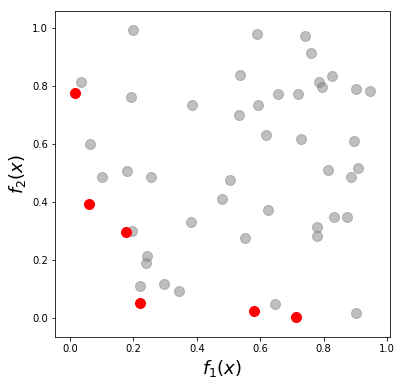

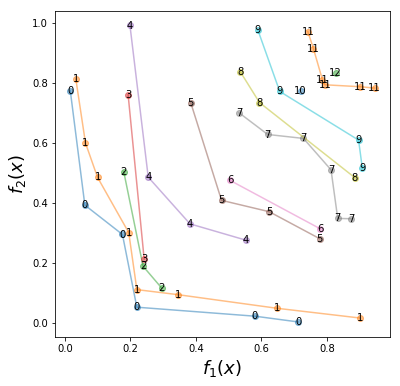

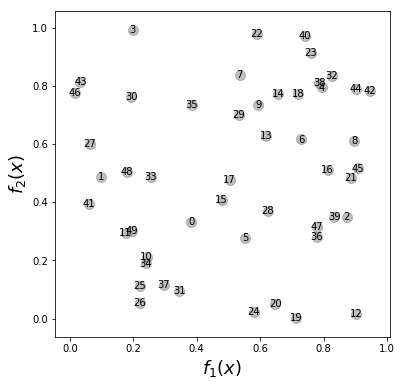

[0.5272164594193651, 999, 0.7388820044009278, 0.43233843742120814, 0.48805638261213624, 0.5701980517287593, 999, 0.6076927213829916]
[43, 12, 20, 49, 31, 1, 27, 25]


In [11]:
points = random_points(50)
plot_nondominatedset(points,nondominatedset(points))
sets = nondominatedsort(points)
plot_nondominatedsort(points,sets)
plot_points(points)
sets.sort(key = len)
print(crawling(sets[-1],points))

In [41]:
lista = [[3,5,1],[20],[1,2,3,4,5,6]]
lista.sort(key = len)
print(lista)


[[20], [3, 5, 1], [1, 2, 3, 4, 5, 6]]


In [34]:
dick = {'1':[2],'3':[6]}
print(dick)
if '6' in dick:
    print("hola")
    dick['1'].append(99)
    print(dick)
else:
    print("no hola")
    dick['6'] = [5]
print(dick)
dick['6'].append(23)
print(dick)

{'1': [2], '3': [6]}
no hola
{'1': [2], '3': [6], '6': [5]}
{'1': [2], '3': [6], '6': [5, 23]}
